# Prepare the data

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
study_results = pd.read_csv("Study_results.csv")

# Combine the data into a single DataFrame
data_complete = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID", "Mouse ID"])
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice.
unique_mice = data_complete['Mouse ID'].nunique()
unique_mice

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
    
duplicate_mice = data_complete[data_complete.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

print(duplicate_mice)


['g989']


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data_complete.drop_duplicates(subset=['Mouse ID'])

clean_data= clean_data.dropna()

clean_data = clean_data.reset_index(drop=True)

clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data['Mouse ID'].nunique()
clean_mice

249

# Generate Summary Statistics

In [115]:
# Calculate the summary statistics
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': ' Tumor Volume Standard Deviation', 'sem': 'Tumor Volume Std. err.'}, inplace=True)

# Display the summary statistics DataFrame
display(summary_statistics)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Std. err.
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


# Create Bar Charts and Pie Charts

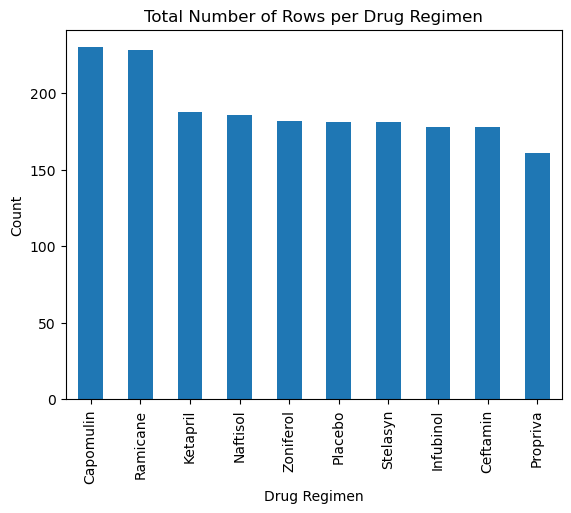

In [135]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = data_complete['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar')

# Set the labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Total Number of Rows per Drug Regimen')

# Display the plot
plt.show()

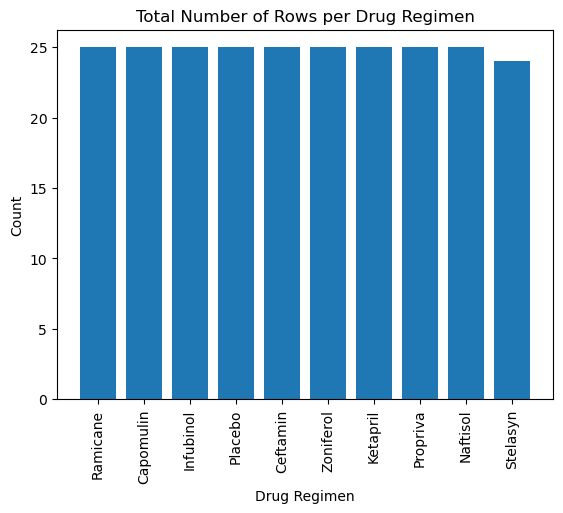

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data['Drug Regimen'].value_counts()

# Generate the bar plot using pyplot
plt.bar(drug_counts.index, drug_counts.values)

# Set the labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Total Number of Rows per Drug Regimen')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

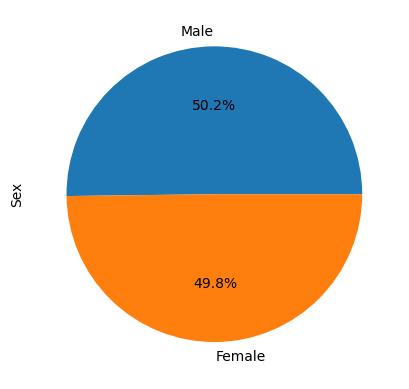

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas. 
gender_counts = clean_data['Sex'].value_counts()

# Generate the pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Display the plot
plt.show()

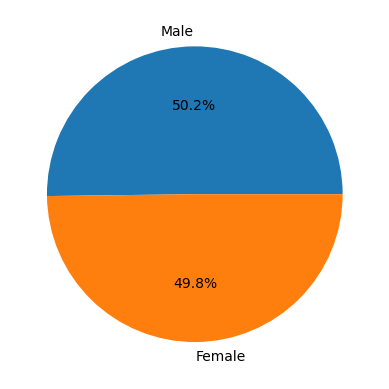

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the occurrences of each gender
gender_counts = clean_data['Sex'].value_counts()

# Generate the pie plot using pyplot
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')

# Display the plot
plt.show()


# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [142]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data_complete.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, data_complete, on=['Mouse ID', 'Timepoint'], how='left')


In [143]:
# Put treatments into a list for for loop (and later for plot labels)
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
# Create empty list to fill with tumor vol data (for plotting)
    tumor_volumes.append(tumor_volumes)
    
    # Calculate the IQR and determine outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the treatment regimen and any potential outliers
    print(f'Treatment Regimen: {treatment}')
    print(f'Potential Outliers: {outliers}\n')


Treatment Regimen: Capomulin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Regimen: Ramicane
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Regimen: Infubinol
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Treatment Regimen: Ceftamin
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



/var/folders/fs/lg4rhwys7vq_r5c6833fss_w0000gn/T/ipykernel_19950/3260211091.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumor_volumes.append(tumor_volumes)
/var/folders/fs/lg4rhwys7vq_r5c6833fss_w0000gn/T/ipykernel_19950/3260211091.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumor_volumes.append(tumor_volumes)
/var/folders/fs/lg4rhwys7vq_r5c6833fss_w0000gn/T/ipykernel_19950/3260211091.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumor_volumes.append(tumor_volumes)
/var/folders/fs/lg4rhwys7vq_r5c6833fss_w0000gn/T/ipykernel_19950/3260211091.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tumor_volumes.append

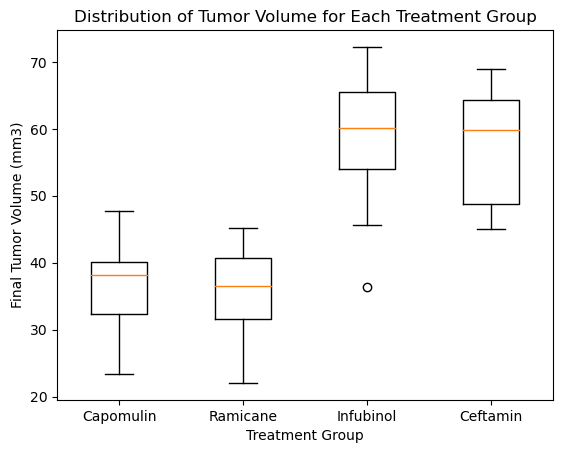

In [144]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of treatment groups
Drug_Regimen= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of tumor volume data for each treatment group
tumor_volume_data = [merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in Drug_Regimen]

# Generate the box plot
plt.boxplot(tumor_volume_data, labels=Drug_Regimen)

# Set the labels and title
plt.xlabel('Treatment Group')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Display the plot
plt.show()

# Create a Line Plot and a Scatter Plot

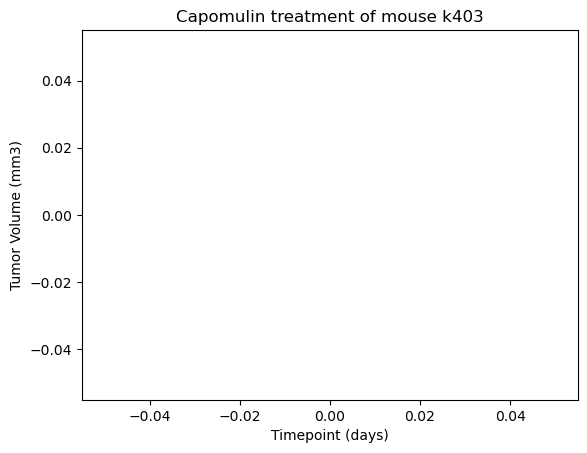

In [157]:
# Filter data for the Capomulin regimen and specific mouse 'k403'
capomulin_data = data_complete[data_complete['Drug Regimen'] == 'Capomulin']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'k403']

# Plot tumor volume vs. time point
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], color='blue')

# Set labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse k403')

# Display the plot
plt.show()

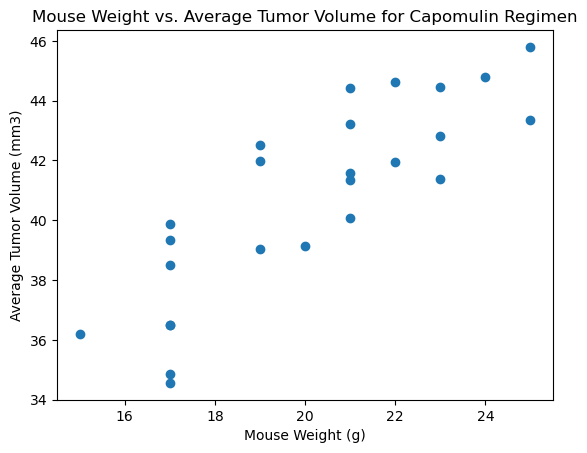

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Plot mouse weight vs. average tumor volume
plt.scatter(mouse_weights, average_tumor_volume)

# Set labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Display the plot
plt.show()

# Correlation and Regression

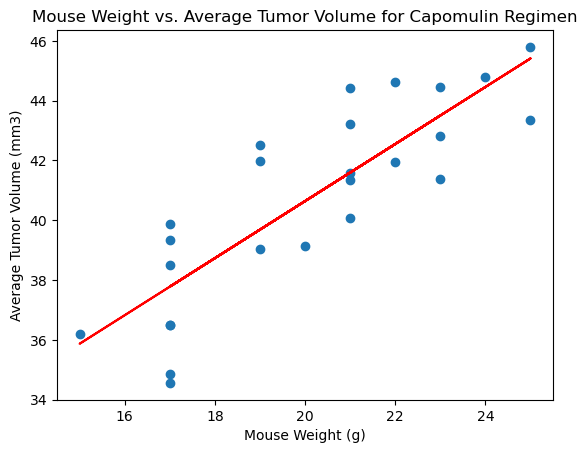

The correlation betweem mouse weight and the average tumor volume is: 0.8419363424694722


In [126]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import numpy as np
from sklearn.linear_model import LinearRegression

# Calculate the correlation coefficient
correlation_coefficient = mouse_weights.corr(average_tumor_volume)

# Create a linear regression model
X = np.array(mouse_weights).reshape(-1, 1)
y = np.array(average_tumor_volume)
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Plot scatter plot with regression line
plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(mouse_weights, model.predict(X), color='red')

# Set labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Display the plot
plt.show()

# Print correlation coefficient, slope, and intercept
print('The correlation betweem mouse weight and the average tumor volume is:', correlation_coefficient)